In [1]:
!kaggle datasets list -s 'Brazilian E-commerce'

ref                                                      title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
olistbr/brazilian-ecommerce                              Brazilian E-Commerce Public Dataset by Olist       43MB  2021-10-01 19:08:27         190194       2743  1.0              
olistbr/marketing-funnel-olist                           Marketing Funnel by Olist                         278KB  2018-11-16 14:00:20          11163        260  1.0              
jayeshsalunke101/brazilian-ecommerce-public-dataset      Brazilian E-Commerce Public Dataset                43MB  2021-04-22 11:28:00            467          9  0.5882353        
nuranugraha/ecommerce-brazilian                          brazilian e commerce                            

In [4]:
!kaggle datasets download -d 'olistbr/brazilian-ecommerce'

100%|██████████████████████████████████████| 42.6M/42.6M [00:26<00:00, 2.04MB/s]
100%|██████████████████████████████████████| 42.6M/42.6M [00:26<00:00, 1.71MB/s]


In [5]:
!ls

Untitled.ipynb          brazilian-ecommerce.zip


In [6]:
!unzip brazilian-ecommerce.zip

Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


# Выгрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(
    font_scale=1,    
    style="whitegrid",
    rc={'figure.figsize':(10,5)}    
        )

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv',
                     parse_dates=[
                         'order_purchase_timestamp',
                         'order_delivered_carrier_date',
                         'order_delivered_customer_date',
                         'order_approved_at',
                         'order_estimated_delivery_date'])
order_items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [178]:
for df in [customers, orders, order_items]:
    display(df.head())
    display(df.info())
    print(df.duplicated().sum())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


None

0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


None

0


# EDA

**Посмотрим на число непривязанных клиентов, сделавших только одну покупку на наших маркеплейсах**

Посмотрим на имеющиеся статусы заказов

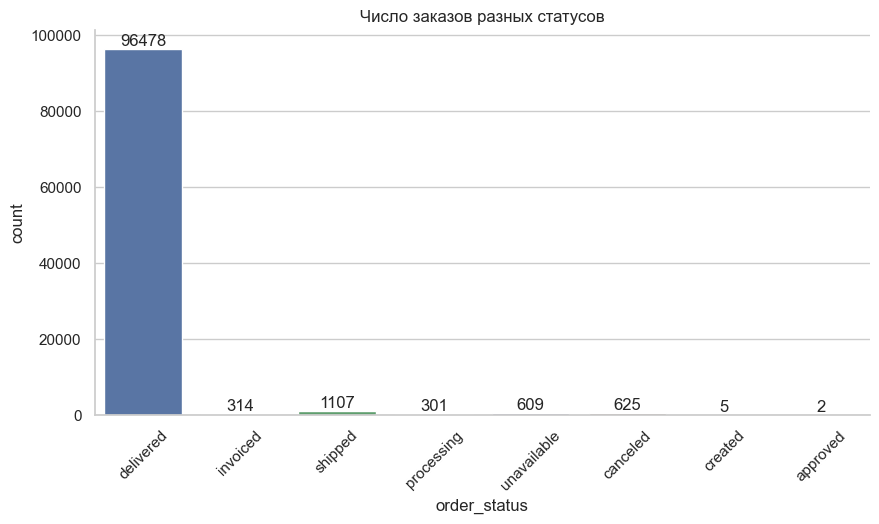

In [71]:
ax = sns.countplot(x=orders.order_status)
ax.tick_params(axis='x', rotation=45)
ax.bar_label(ax.containers[0]);
plt.title("Число заказов разных статусов")
sns.despine()

Будем считать успешной покупкой оплаченный и доставленный заказ

In [157]:
delivered_orders = orders.query('order_status == "delivered"')
customer_orders = customers.merge(delivered_orders, on=['customer_id'], how='right')
customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [36]:
customer_orders.nunique()

customer_id                      99441
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
order_id                         96478
order_status                         1
order_purchase_timestamp         95956
order_approved_at                88274
order_delivered_carrier_date     80106
order_delivered_customer_date    95658
order_estimated_delivery_date      445
dtype: int64

In [11]:
cnt_1p_cust = customer_orders.groupby('customer_unique_id', as_index=False)\
    .agg({'order_id' : 'count'})\
    .rename(columns={'order_id' : 'order_count'})\
    .query('order_count == 1')\
    .shape[0]
print(f'Число покупателей с одной покупкой: {cnt_1p_cust}')

Число покупателей с одной покупкой: 90557


**Посмотрим сколько заказов в месяц не доставляется и по каким причинам**

Оставим только заказы в статусах: shipped, canceled, unavailable, processing. По ним можно понять, почему заказ еще не был доставлен, то есть он либо отправлен, отменен, недоступен или только обрабатывается

In [60]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [61]:
status = ["shipped", 'canceled', 'unavailable', 'processing']
ndel_orders = orders.loc[orders.order_status.isin(status)]
ndel_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13


In [62]:
ndel_orders['order_estimated_delivery_month'] = ndel_orders.order_estimated_delivery_date\
    .apply(lambda x: x.strftime('%Y-%m'));

/var/folders/hk/z1wp_xq913x0vc8r72hc957w0000gp/T/ipykernel_1012/1774061556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndel_orders['order_estimated_delivery_month'] = ndel_orders.order_estimated_delivery_date\


In [63]:
pvt = ndel_orders.pivot_table(index='order_estimated_delivery_month',
                       columns='order_status',
                        values='order_id',
                        aggfunc='count')

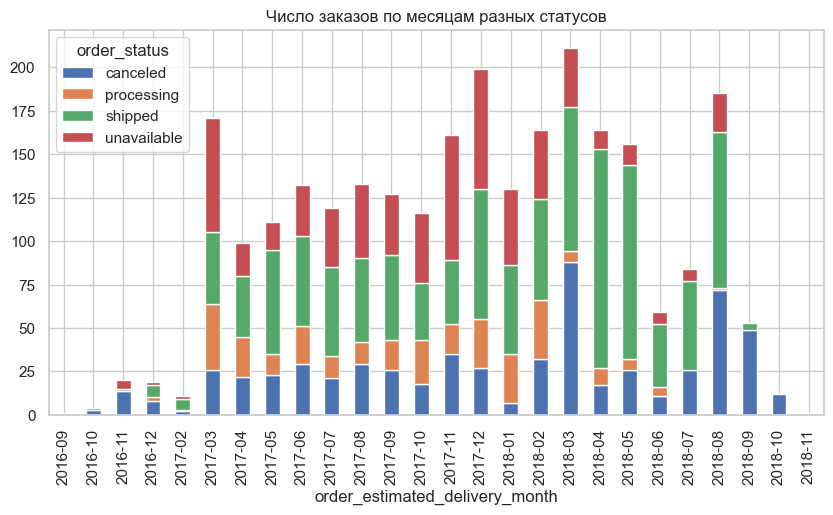

In [64]:
ax = pvt.plot.bar(stacked=True);
plt.title('Число заказов по месяцам разных статусов');

In [95]:
pvt_means = pvt.mean().to_frame().rename(columns={0:'order_count_mean'}).reset_index().round(2)

for x in pvt_means.values:
    print(f'{x[1]} заказов в среднем в месяц было в состоянии {x[0]}')

24.04 заказов в среднем в месяц было в состоянии canceled
15.84 заказов в среднем в месяц было в состоянии processing
48.13 заказов в среднем в месяц было в состоянии shipped
29.0 заказов в среднем в месяц было в состоянии unavailable


Посмотрим, на распределение числа покупок по дням недели

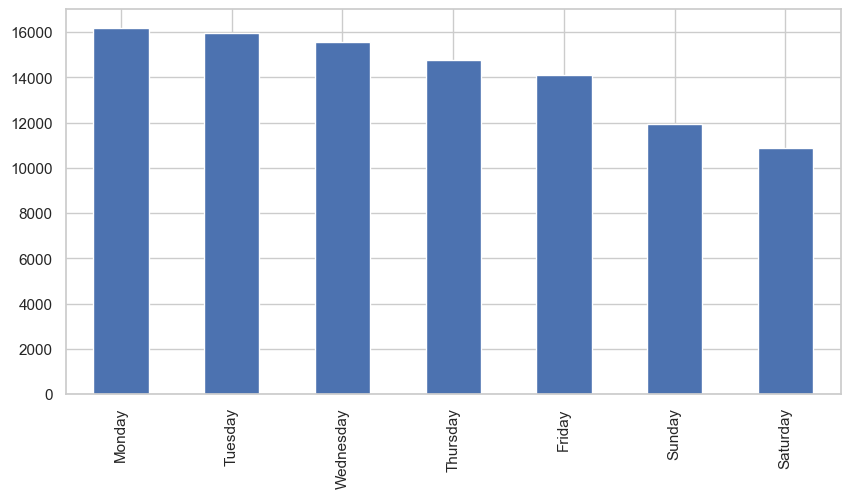

In [29]:
orders.order_purchase_timestamp.dt.day_name()\
    .value_counts()\
    .plot.bar();

Посмотрим в какой день недели чаще всего покупается каждый товар

In [111]:
items = order_items.merge(orders, on='order_id')
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [55]:
items['week_day'] = items.order_purchase_timestamp.dt.day_name()
prod_pop_day = items.groupby('product_id', as_index=False)\
    .agg({'week_day' : pd.Series.mode})
prod_pop_day

,product_id,week_day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,"[Saturday, Sunday]"
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


# Retention пользователей

## Создание датасета

In [5]:
def make_df(df):
    # собираем датасет нужных данных
    profile = df\
    .groupby('customer_unique_id', as_index=False)\
    .agg({
        'order_id' : 'first',
        'order_status' : 'first',
        'customer_state' : 'first',
        'order_purchase_timestamp' : 'min'
    })\
    .rename(columns={'order_purchase_timestamp' : 'first_purchase_ts'})
    
    # сделаем колонку order status флагом покупки
    profile.order_status = profile.order_status.apply(
        lambda x : 'not_delivered' if x != 'delivered' else x
        )
    # дата первой покупки
    profile['first_purchase_dt'] = profile.first_purchase_ts.dt.date
    profile['first_purchase_mn'] = profile.first_purchase_ts.astype('datetime64[M]')
    # число новых пользователей 
    new_users = (
        profile.groupby('first_purchase_mn', as_index=False)
        .agg({'customer_unique_id': 'count'})\
        .rename(columns={'customer_unique_id' : 'customer_counts'})
    )
    
    profile = profile.merge(new_users, on='first_purchase_mn')
    return profile

## Функция retention

In [6]:
def retention(profile, df, obs_date, horizon, dims=[]): 
    
    # последняя первая покупка до начала анализа
    last_date = pd.to_datetime(obs_date).date() - pd.Timedelta(horizon*31,'d')
    obs_df = profile.query('first_purchase_dt <= @last_date')
    
    dfc = df.copy()
    dfc['purchase_mn'] = dfc.order_purchase_timestamp.astype('datetime64[M]')
    
    # добавляем в результирующий датасет дату покупки
    dfc = dfc.loc[:, ['customer_unique_id', 'purchase_mn']]
    obs_df = obs_df.merge(dfc, on='customer_unique_id', how='left')
    
    #число месяцев после первой покупки
    obs_df['period'] = (
        obs_df['purchase_mn'].dt.to_period('M').astype(int)\
        - obs_df['first_purchase_mn'].dt.to_period('M').astype(int)
    
    )
    def cohorts_retention(df, dims, horizon):
        # число покупок по когортам и периодам после первой покупки
        res = df.pivot_table(
            index=dims, columns='period', values='customer_unique_id', aggfunc='nunique'
        )
        # общее число покупов в когорте
        cohort_sizes = (
            df.groupby(dims)
            .agg({'customer_unique_id': 'nunique'})
            .rename(columns={'customer_unique_id': 'cohort_size'})
        )
        res = cohort_sizes.merge(res, on=dims, how='left').fillna(0)
        # считаем retention
        res = res.div(res['cohort_size'], axis=0)
        res = res[['cohort_size'] + list(range(horizon))]
        res.drop(columns='cohort_size', inplace=True)
        #result['cohort_size'] = cohort_sizes
        #result = result.style.format("{:.2%}", subset=list(range(horizon)))
        return res

    # когорты по датам первой покупки
    cohort_data = cohorts_retention(obs_df, dims, horizon)
    times_cohort_data = cohorts_retention(obs_df, dims + ['first_purchase_mn'], horizon)

    return obs_df, cohort_data, times_cohort_data

## Подсчет retention

In [7]:
customer_orders = orders.merge(customers, on='customer_id')
profile = make_df(customer_orders)
customer_orders['purchase_mn'] = customer_orders.order_purchase_timestamp.astype('datetime64[M]')

In [442]:
customer_orders.order_estimated_delivery_date.max()

Timestamp('2018-11-12 00:00:00')

Определим как дату начала исследования последнюю дату покупки, и будем смотреть на retention на 6-ой месяц

In [443]:
obs_date = '2018-12-01'
horizon = 6

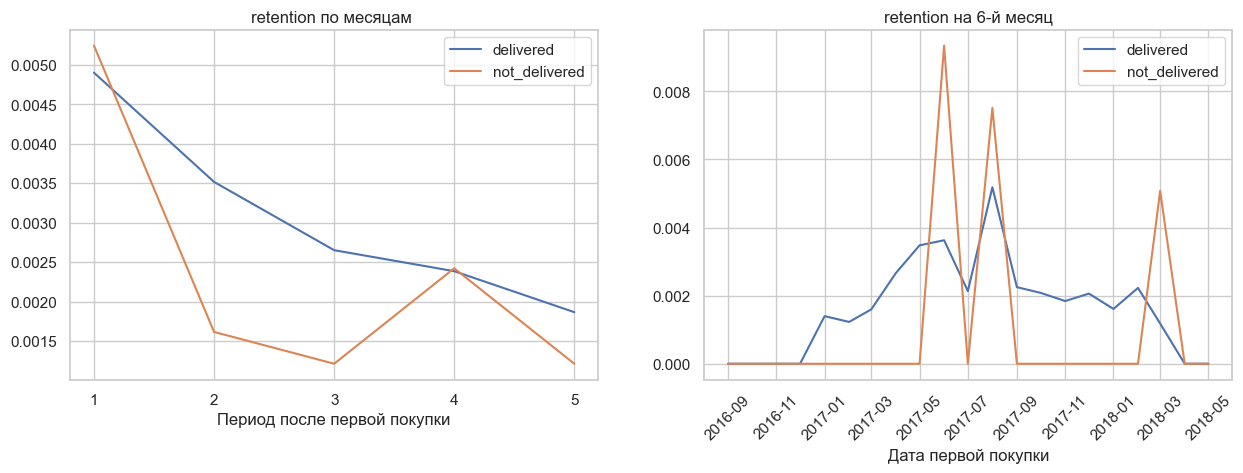

In [491]:
dims = ['order_status']
data, ret, ret_time = retention(profile, customer_orders, obs_date, horizon, dims)

plt.figure(figsize=(15,10))

ax1 = plt.subplot(2,2,1)
sns.lineplot(ret.iloc[0, 1:], label='delivered', ax=ax1);
sns.lineplot(ret.iloc[1, 1:], label='not_delivered', ax=ax1);
plt.title(f'retention по месяцам ')
plt.ylabel('')
plt.xlabel('Период после первой покупки');
plt.xticks(list(ret.columns[1:]));

ax2 = plt.subplot(2,2,2)
sns.lineplot(data=ret_time, x='first_purchase_mn', y=horizon - 1, hue='order_status', ax=ax2);
plt.title(f'retention на {horizon}-й месяц');
plt.xlabel('Дата первой покупки');
plt.ylabel('')
plt.legend()
ax2.tick_params(axis='x', rotation=45)

Выше всего показатель возврата на 6-ий месяц среди пользователей сделавших успешную покупку первую покупку в августе 2018 года 

## Качество клиентов

Посотрим на число клиентов разной ценности. Ценность клиента определим по RFM-score

In [8]:
df = customer_orders.merge(order_items, on='order_id')\
    .loc[:, ['customer_unique_id',
             'order_id',
             'order_status',
             'order_purchase_timestamp',
             'purchase_mn',
             'price']]
df.head()

,customer_unique_id,order_id,order_status,order_purchase_timestamp,purchase_mn,price
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-01,29.99
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-01,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-01,159.90
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-01,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-01,19.90


In [9]:
df.groupby('purchase_mn', as_index=False)\
    .agg({'customer_unique_id' : 'nunique'})\
    .sort_values(by='purchase_mn', ascending=False).head(13)

,purchase_mn,customer_unique_id
23,2018-09-01,1
22,2018-08-01,6411
21,2018-07-01,6211
20,2018-06-01,6121
19,2018-05-01,6795
18,2018-04-01,6878
17,2018-03-01,7096
16,2018-02-01,6537
15,2018-01-01,7120
14,2017-12-01,5557


In [10]:
df.order_purchase_timestamp.max()

Timestamp('2018-09-03 09:06:57')

**Последняя дата покупки сделана за сентябрь, но месяц неполный. Будем считать метрику за год от июля 2018 года**

In [11]:
last_month = '2018-08-01'
first_month = '2017-09-01'

In [12]:
df = df.query('@first_month <= purchase_mn < @last_month')

In [13]:
df1 = df.groupby('customer_unique_id', as_index=False)\
    .agg({'price' : 'sum'})\
    .rename(columns={'price' : 'revenue'})\
    .sort_values(by='revenue', ascending=False)

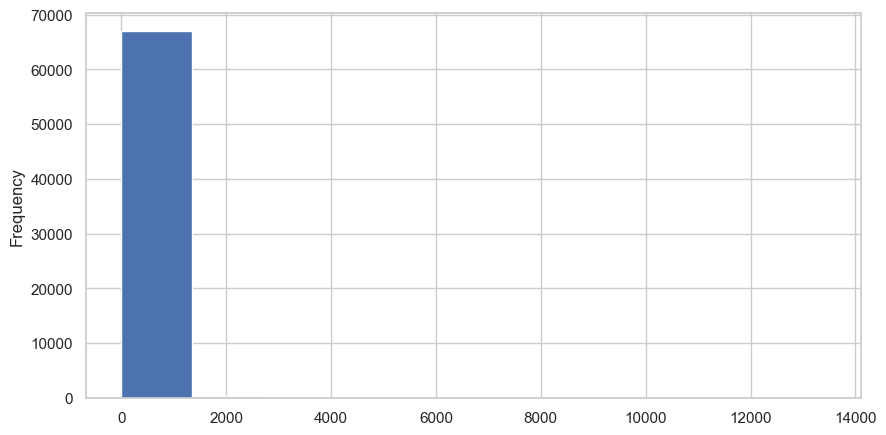

In [14]:
df1.revenue.plot.hist();

Видны сильные выбросы в выручке, так что разобьем обычных клиентов и сверхбогатых на две группы

In [15]:
df1.revenue.median()

89.9

In [28]:
df['purchase_date'] = df.order_purchase_timestamp.dt.date

rfm_df = df.groupby('customer_unique_id', as_index=False)\
    .agg({'purchase_date' : 'max',
        'price' : 'sum', 'order_id' : 'count'})\
    .rename(columns={'order_purchase_timestamp' : 'last_purchase', 
                    'price' : 'monetary',
                    'order_id' : 'frequency'})
rfm_df['recency'] = rfm_df.purchase_date.apply(lambda x : abs(x - datetime.strptime(last_month, '%Y-%m-%d').date()).days)

rfm_df_s = rfm_df.query('monetary <= 1000').copy()
rfm_df_m = rfm_df.query('1000 < monetary').copy()

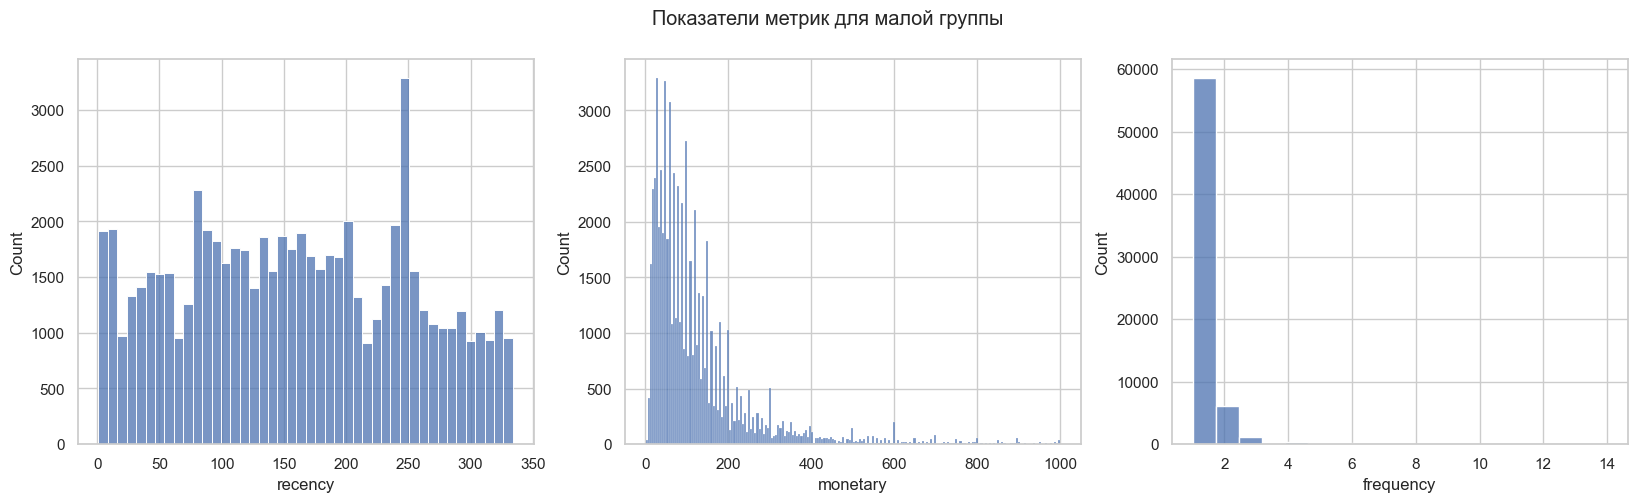

In [17]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.histplot(rfm_df_s.recency, ax=ax[0]);
sns.histplot(rfm_df_s.monetary, ax=ax[1]);
sns.histplot(rfm_df_s.frequency, ax=ax[2]);
fig.suptitle('Показатели метрик для малой группы');

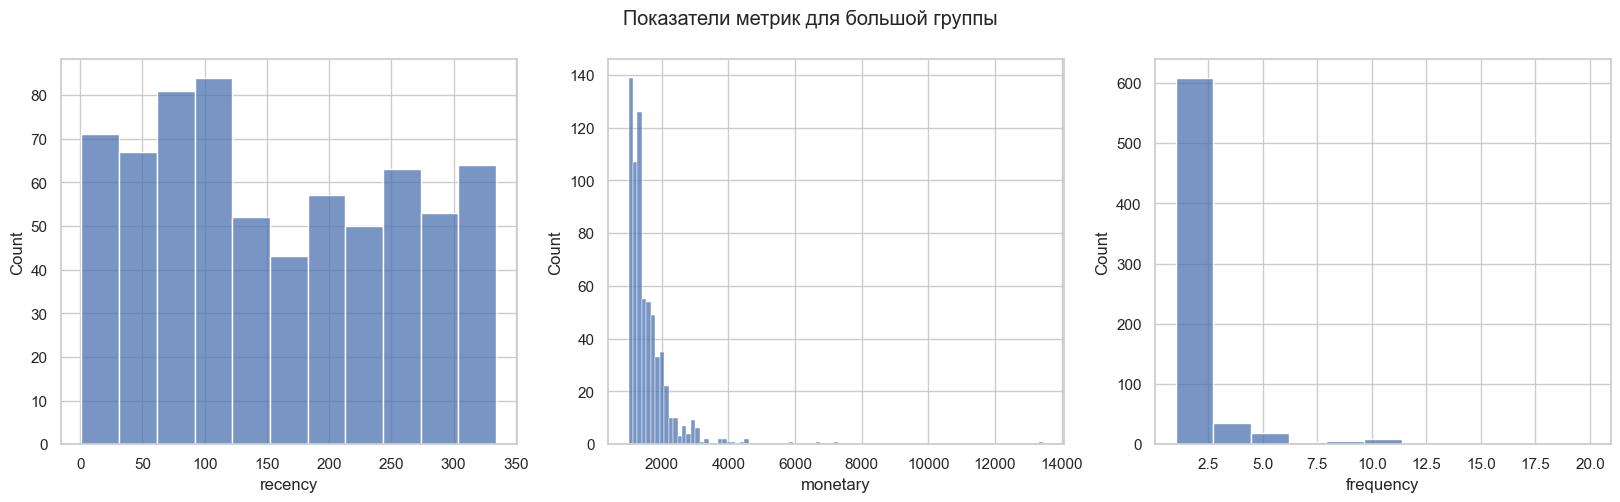

In [18]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.histplot(rfm_df_m.recency, ax=ax[0]);
sns.histplot(rfm_df_m.monetary, ax=ax[1]);
sns.histplot(rfm_df_m.frequency, ax=ax[2]);
fig.suptitle('Показатели метрик для большой группы');

Посчитаем RFM-score по 4-х ранговой системе. Заметим, что дискретизация показателя frequency будет работать плохо из-за большого числа повторов, поэтому для нее напишем свою функцию дискретизации

In [69]:
rfm_df_s.frequency.value_counts()

1     58651
2      6088
3      1151
4       403
5       173
6       136
7        28
8        11
9         8
12        7
11        5
10        3
14        2
13        2
Name: frequency, dtype: int64

In [59]:
def get_frequency(x):
    if x == 1:
        return 1
    if x == 2:
        return 2
    if x in (3,4,5,6):
        return 3
    return 4

In [74]:
rfm_df_s['r'] = 5 - (pd.qcut(rfm_df_s.recency, 4, labels=False) + 1)
rfm_df_s['f'] = rfm_df_s.frequency.apply(get_frequency)
rfm_df_s['m'] = (pd.qcut(rfm_df_s.monetary, 4, labels=False) + 1)
rfm_df_s['RFM_score'] = (rfm_df_s.r + rfm_df_s.f + rfm_df_s.m)

Проведем сегментацию

In [79]:
def rfm_level(df):
    if df['RFM_score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_score'] >= 8) and (df['RFM_score'] < 9)):
        return 'Champions'
    elif ((df['RFM_score'] >= 7) and (df['RFM_score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_score'] >= 6) and (df['RFM_score'] < 7)):
        return 'Potential'
    elif ((df['RFM_score'] >= 5) and (df['RFM_score'] < 6)):
        return 'Promising'
    elif ((df['RFM_score'] >= 4) and (df['RFM_score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [110]:
rfm_df_s['segment'] = rfm_df_s.apply(rfm_level,axis=1)
rfm_df_s.head()

,customer_unique_id,purchase_date,monetary,frequency,recency,r,f,m,rfm_score,RFM_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,129.90,1,83,4,1,3,8,8,Champions
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,18.90,1,86,3,1,1,5,5,Promising
2,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,25.99,1,293,1,1,1,3,3,Require Activation
3,0004aac84e0df4da2b147fca70cf8255,2017-11-14,180.00,1,260,1,1,4,6,6,Potential
4,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05,154.00,1,118,3,1,4,8,8,Champions


**Число пользователей разных сегментов**

In [109]:
rfm_df_s.groupby('segment', as_index=False)\
    .agg({'r' : 'mean',
          'f' : 'mean',
          'm' : 'mean',
          'RFM_score' : 'count'
         })\
    .rename(columns={'r':'r_mean', 'f':'f_mean', 'm' : 'm_mean', 'RFM_score': 'count'})\
    .sort_values(by='count', ascending=False)

,segment,r_mean,f_mean,m_mean,count
4,Potential,2.529709,1.065886,2.404405,15618
2,Loyal,2.910707,1.152421,2.936872,12039
5,Promising,2.010193,1.040601,1.949206,11773
1,Champions,3.319166,1.260962,3.419872,8917
3,Needs Attention,1.503258,1.016168,1.480574,8288
0,Can't Loose Them,3.737976,1.681619,3.876923,6175
6,Require Activation,1.000000,1.000000,1.000000,3858
